# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

# READING FILE

In [3]:
df=pd.read_csv("Life-Expectancy-Data-Updated.csv")
df.head().T

,0,1,2,3,4
Country,Turkiye,Spain,India,Guyana,Israel
Region,Middle East,European Union,Asia,South America,Middle East
Year,2015,2015,2007,2006,2012
Infant_deaths,11.1,2.7,51.5,32.8,3.4
Under_five_deaths,13.0,3.3,67.9,40.5,4.3
Adult_mortality,105.824,57.9025,201.0765,222.1965,57.951
Alcohol_consumption,1.32,10.35,1.57,5.68,2.89
Hepatitis_B,97,97,60,93,97
Measles,65,94,35,74,89
BMI,27.8,26.0,21.2,25.3,27.0


In [4]:
df.shape

(2864, 21)

THERE ARE 21 COLUMNS AND 2864 ROWS

In [5]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [7]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [8]:
df.duplicated().sum()

0

# VISUALIZATION LIFE EXPECTANCY

COMPARISON OF THE AVERAGE LIFE EXPECTANCY BY REGION.

In [9]:
life_exp=df.groupby(["Region"])["Life_expectancy"].mean()
life_exp

Region
Africa                           57.847304
Asia                             69.454861
Central America and Caribbean    72.437500
European Union                   77.715046
Middle East                      73.975446
North America                    77.841667
Oceania                          69.517614
Rest of Europe                   74.525417
South America                    72.780729
Name: Life_expectancy, dtype: float64

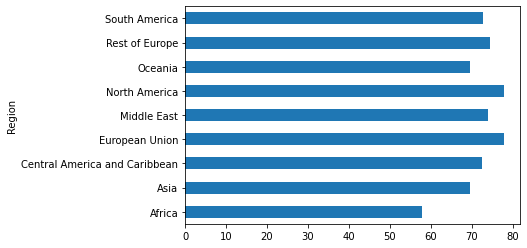

In [10]:
life_exp.plot(kind="barh")
plt.xlabel="region"
plt.ylabel="life_exp"
plt.title="bar graph"
plt.show()

BASED ON THESE AVERAGE LIFE EXPECTANCIES,WE CAN SEE THAT THE HIGHESH HAVE BEEN IN THE EUROPEAN UNION AND NORTH AMERICA

# HANDLING CATAGORICAL DATA

In [11]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [12]:
df["Country"]=oe.fit_transform(df[["Country"]])
df["Region"]=oe.fit_transform(df[["Region"]])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   float64
 1   Region                       2864 non-null   float64
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

# SEAPRTING FEATURE AND TARGET i.e X AND Y

In [14]:
x=df.iloc[:,0:20]
x

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
0,164.0,4.0,2015,11.1,13.0,105.8240,1.320,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1
1,148.0,3.0,2015,2.7,3.3,57.9025,10.350,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0
2,74.0,1.0,2007,51.5,67.9,201.0765,1.570,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1
3,69.0,8.0,2006,32.8,40.5,222.1965,5.680,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1
4,79.0,4.0,2012,3.4,4.3,57.9510,2.890,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,118.0,0.0,2000,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,0.49,399,11.33,12.8,12.9,1.1,0,1
2860,108.0,1.0,2009,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,0.02,2515,2.67,2.2,2.3,9.1,0,1
2861,149.0,1.0,2004,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,0.02,2130,19.39,15.4,15.5,10.3,0,1
2862,95.0,3.0,2002,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,0.05,7424,3.44,3.3,3.3,11.1,1,0


In [15]:
y=df.iloc[:,-1]
y

0       76.5
1       82.8
2       65.4
3       67.0
4       81.7
        ... 
2859    49.9
2860    66.9
2861    74.3
2862    71.8
2863    82.4
Name: Life_expectancy, Length: 2864, dtype: float64

# MODEL BUILDING

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.2)

In [17]:
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,test_size=0.1)

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",mode=min,verbose=1,patience=9)

In [22]:
ann=Sequential()

ann.add(Dense(units=100,activation="relu"))
ann.add(Dense(units=50,activation="relu"))
ann.add(Dense(units=100,activation="relu"))
ann.add(Dropout(0.35))
ann.add(Dense(units=50,activation="relu"))

ann.add(Dense(units=1))

ann.compile(optimizer="adam",loss="mse")

ann.fit(xtrain,ytrain,validation_data=(xval,yval),verbose=1,callbacks=[early_stop],batch_size=40,epochs=500)

Epoch 1/500
52/52 [==============================] - 3s 13ms/step - loss: 3229.4746 - val_loss: 58774970368.0000
Epoch 2/500
52/52 [==============================] - 0s 5ms/step - loss: 246.2893 - val_loss: 20978210816.0000
Epoch 3/500
52/52 [==============================] - 0s 5ms/step - loss: 132.0164 - val_loss: 19050536960.0000
Epoch 4/500
52/52 [==============================] - 0s 6ms/step - loss: 107.8192 - val_loss: 18378086400.0000
Epoch 5/500
52/52 [==============================] - 0s 6ms/step - loss: 89.2178 - val_loss: 16952331264.0000
Epoch 6/500
52/52 [==============================] - 0s 6ms/step - loss: 75.4243 - val_loss: 17582614528.0000
Epoch 7/500
52/52 [==============================] - 0s 5ms/step - loss: 69.7203 - val_loss: 17185728512.0000
Epoch 8/500
52/52 [==============================] - 0s 5ms/step - loss: 62.1895 - val_loss: 16689740800.0000
Epoch 9/500
52/52 [==============================] - 0s 5ms/step - loss: 56.1307 - val_loss: 18449020928.0000
Epoc

In [23]:
ann.history.history

{'loss': [3229.474609375,
  246.289306640625,
  132.0164337158203,
  107.81922149658203,
  89.2177505493164,
  75.42427062988281,
  69.72028350830078,
  62.189517974853516,
  56.13069534301758,
  50.29277420043945,
  46.338069915771484,
  47.42090606689453,
  43.74774932861328,
  42.16437911987305,
  41.28385543823242,
  39.11484909057617,
  39.09988784790039],
 'val_loss': [58774970368.0,
  20978210816.0,
  19050536960.0,
  18378086400.0,
  16952331264.0,
  17582614528.0,
  17185728512.0,
  16689740800.0,
  18449020928.0,
  19452862464.0,
  20739868672.0,
  19384088576.0,
  21325979648.0,
  20706637824.0,
  18873176064.0,
  20215744512.0,
  21823399936.0]}

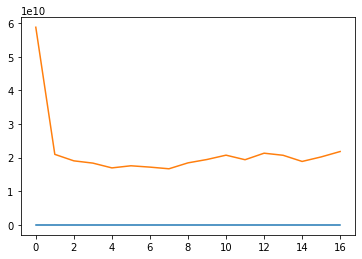

In [24]:
plt.plot(pd.DataFrame(ann.history.history))
plt.show()

In [25]:
ypred=ann.predict(xtest)

18/18 [==============================] - 0s 2ms/step


In [26]:
ypred

array([[70.85216 ],
       [73.24347 ],
       [78.9078  ],
       [75.22898 ],
       [70.43309 ],
       [41.817635],
       [69.285255],
       [69.98647 ],
       [66.52952 ],
       [64.92246 ],
       [68.03563 ],
       [83.444374],
       [53.38976 ],
       [56.451347],
       [65.71624 ],
       [50.69807 ],
       [76.51391 ],
       [82.044395],
       [67.57529 ],
       [50.16181 ],
       [81.665565],
       [75.111755],
       [70.28837 ],
       [83.31807 ],
       [75.96965 ],
       [77.94974 ],
       [76.04425 ],
       [65.064766],
       [81.914604],
       [56.36007 ],
       [47.679142],
       [57.510002],
       [78.79305 ],
       [69.64022 ],
       [71.04054 ],
       [50.49443 ],
       [72.23496 ],
       [84.346375],
       [71.808014],
       [66.639084],
       [72.20417 ],
       [59.03771 ],
       [68.71704 ],
       [68.46011 ],
       [73.848335],
       [83.90343 ],
       [70.012764],
       [73.493286],
       [58.93708 ],
       [74.83487 ],


# FINDING ACCURACY

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [28]:
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
r2_score=r2_score(ytest,ypred)

In [29]:
print(f" mae --{mae} \n mse --{mse} \n r2_score --- {r2_score}")

 mae --1.940031149499703 
 mse --5.906241232580957 
 r2_score --- 0.9321255545724008
